In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df_store=pd.read_csv("googleplaystore.csv")
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df_store['Size'] = df_store['Size'].str.replace('M','000',regex=False)
df_store['Size'] = df_store['Size'].str.replace('G','000000',regex=False) 
df_store['Size'] = df_store['Size'].str.replace('+','',regex=False) 
df_store['Size'] = df_store['Size'].str.replace(',','',regex=False) 

df_store['Size'] = df_store['Size'].str.replace('k','',regex=False) 
df_store['Size'] = df_store['Size'].str.replace('Varies with device','0',regex=False) 
df_store['Size'] = df_store['Size'].astype('float64')

df_store.drop(df_store[df_store['Reviews']=='3.0M'].index,inplace=True)
df_store['Reviews']=pd.to_numeric(df_store['Reviews'])

df_store['Price']=df_store['Price'].apply(lambda x:x.replace("$",""))
df_store['Price']=pd.to_numeric(df_store['Price'])

#installs
df_store['Installs']=df_store['Installs'].apply(lambda x:x.replace("+",""))
df_store['Installs']=df_store['Installs'].apply(lambda x:x.replace(",",""))
df_store['Installs']=pd.to_numeric(df_store['Installs'])

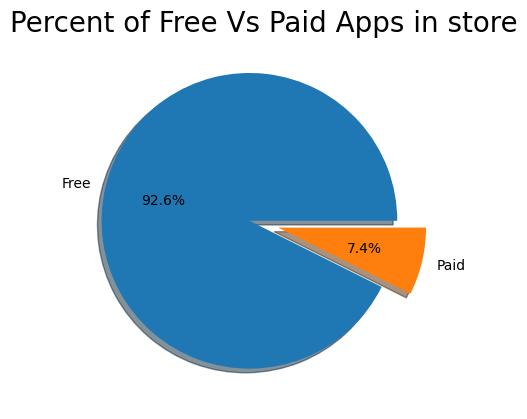

In [4]:
labels = df_store['Type'].value_counts(sort = True).index
sizes = df_store['Type'].value_counts(sort = True)
explode = (0.1,0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()
# plt.bar(df_store.Type.value_counts().index,df_store.Type.value_counts().values)
# plt.show()

In [5]:
import plotly.express as px
df = df_store.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
px.bar(df, title = 'Most categories installed')

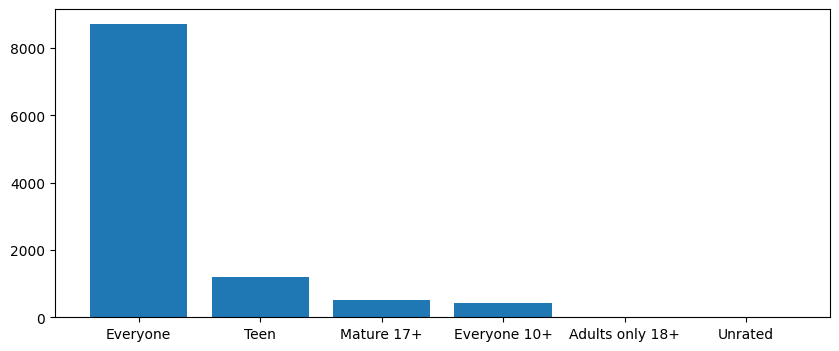

In [6]:
fig = plt.figure(figsize =(10, 4))
plt.bar(df_store['Content Rating'].value_counts().index,df_store['Content Rating'].value_counts().values)
plt.show()

In [7]:
df_review=pd.read_csv("googleplaystore_user_reviews.csv")
df_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [8]:
df_merge=df_store.merge(df_review,on='App')
df_merge.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [9]:
#Checking if there is any duplicate value.
df_merge.info(),df_merge.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  int64  
 4   Size                    122662 non-null  float64
 5   Installs                122662 non-null  int64  
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  float64
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

(None, 81001)

In [10]:
#droping nan and duplicate value
df_merge.dropna(inplace=True)
df_merge.drop_duplicates(inplace=True)

In [11]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     40376 non-null  object 
 1   Category                40376 non-null  object 
 2   Rating                  40376 non-null  float64
 3   Reviews                 40376 non-null  int64  
 4   Size                    40376 non-null  float64
 5   Installs                40376 non-null  int64  
 6   Type                    40376 non-null  object 
 7   Price                   40376 non-null  float64
 8   Content Rating          40376 non-null  object 
 9   Genres                  40376 non-null  object 
 10  Last Updated            40376 non-null  object 
 11  Current Ver             40376 non-null  object 
 12  Android Ver             40376 non-null  object 
 13  Translated_Review       40376 non-null  object 
 14  Sentiment               40376 non-null  ob

In [12]:
df_merge.drop(columns=['App','Type','Genres','Last Updated','Current Ver','Android Ver','Translated_Review','Sentiment_Polarity','Sentiment_Subjectivity'],inplace=True)

In [13]:

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40376 entries, 0 to 122661
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        40376 non-null  object 
 1   Rating          40376 non-null  float64
 2   Reviews         40376 non-null  int64  
 3   Size            40376 non-null  float64
 4   Installs        40376 non-null  int64  
 5   Price           40376 non-null  float64
 6   Content Rating  40376 non-null  object 
 7   Sentiment       40376 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 2.8+ MB


#Label Encoding

In [14]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_merge['Category']= label_encoder.fit_transform(df_merge['Category'])
Category_class=list(label_encoder.classes_)
# df_merge['Installs']= label_encoder.fit_transform(df_merge['Installs'])
# Installs_class=list(label_encoder.classes_)
df_merge['Sentiment']= label_encoder.fit_transform(df_merge['Sentiment'])
Sentiment_class=list(label_encoder.classes_)
print("category class",Category_class)
# print("Install class",Installs_class)
print("Sentiment class",Sentiment_class)
df_merge.head()

category class ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
Sentiment class ['Negative', 'Neutral', 'Positive']


,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Sentiment
0,0,3.9,967,14000.0,500000,0.0,Everyone,0
1,0,3.9,967,14000.0,500000,0.0,Everyone,0
2,0,3.9,967,14000.0,500000,0.0,Everyone,1
4,0,3.9,967,14000.0,500000,0.0,Everyone,2
5,0,3.9,967,14000.0,500000,0.0,Everyone,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:

feature=df_merge[['Category','Reviews','Size','Installs','Price','Sentiment']]
target=df_merge['Rating']
X_train, X_test,y_train, y_test = train_test_split(feature,target , 
                                   test_size=0.40, 
                                   shuffle=True)

# #trying different model Svm
# from sklearn.svm import SVR
# svr_model = SVR()
# svr_model.fit(X_train, y_train)
# Y_pred = svr_model.predict(X_test) 
# svm_mse = mean_squared_error(y_test, Y_pred)
# svm_mse


In [22]:
from sklearn.ensemble import RandomForestRegressor

Random_regressor = RandomForestRegressor(n_estimators=20, random_state=0)

Random_regressor.fit(X_train, y_train)
RY_pred = Random_regressor.predict(X_test) 
random_mse = mean_squared_error(y_test, RY_pred)
print("The mean square error is of our model is {}%".format(round(random_mse, 4)))

The mean square error is of our model is 0.0001%


In [21]:
X_test,y_test

(        Category   Reviews     Size   Installs  Price  Sentiment
 57213         14     68057  85000.0   10000000    0.0          2
 80292         27   1259075  62000.0   10000000    0.0          2
 51148         14  14200550  52000.0  100000000    0.0          2
 20391          8      2525      1.2     100000    0.0          2
 107872        23    266434      0.0   10000000    0.0          2
 ...          ...       ...      ...        ...    ...        ...
 109241        23    115773      0.0   10000000    0.0          2
 98565         28     37167      0.0    1000000    0.0          2
 100254        30     52028      0.0    5000000    0.0          2
 28741         12     10657  58000.0    1000000    0.0          2
 4394           4     19023      0.0    1000000    0.0          1
 
 [16151 rows x 6 columns],
 57213     4.1
 80292     4.8
 51148     4.5
 20391     4.0
 107872    4.3
          ... 
 109241    4.2
 98565     4.6
 100254    4.4
 28741     3.9
 4394      4.1
 Name: Rating,

In [23]:
Random_regressor.predict([[24,1964,14,500034,0,1]])

C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([4.315])

In [148]:
# import xgboost as xgb
# xgb_model = xgb.XGBRegressor(
#    learning_rate=0.1,
#                        n_estimators=100,
#                        max_depth=4,
#                        min_child_weight=0,
#                        gamma=0.6,
#                        scale_pos_weight=1,
#                        seed=27,
#                        reg_alpha=0.00006,
#                        random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_model.score(X_test,y_test)
# Y_pred = xgb_model.predict(X_test) 
# xg_mse = mean_squared_error(y_test, Y_pred)
# print("The accuracy of our model is {}%".format(round(xg_mse, 4)))
# xg_mse

The accuracy of our model is 0.0264%


0.026390733076102738

In [24]:
# print("The accuracy of our model is {}%".format(round(xg_mse, 4)))
print("The accuracy of our model is {}%".format(round(random_mse, 4)))
# print("The accuracy of our model is {}%".format(round(svm_mse, 4)))

The accuracy of our model is 0.0001%


random forest is preforming well

The best performing model is Random forest till now.

In [25]:
random_score=Random_regressor.score(X_test,y_test)
print("The score of our random forest model is {}%".format(round(random_score, 4)*100))
# print("The score of our xgboost model is {}%".format(round(xgb_model.score(X_test,y_test), 4)*100))
# print("The score of our svm model is {}%".format(round(svr_model.score(X_test,y_test), 4)*100))


The score of our random forest model is 99.85000000000001%


In [26]:
Category_class,Sentiment_class

(['ART_AND_DESIGN',
  'AUTO_AND_VEHICLES',
  'BEAUTY',
  'BOOKS_AND_REFERENCE',
  'BUSINESS',
  'COMICS',
  'COMMUNICATION',
  'DATING',
  'EDUCATION',
  'ENTERTAINMENT',
  'EVENTS',
  'FAMILY',
  'FINANCE',
  'FOOD_AND_DRINK',
  'GAME',
  'HEALTH_AND_FITNESS',
  'HOUSE_AND_HOME',
  'LIBRARIES_AND_DEMO',
  'LIFESTYLE',
  'MAPS_AND_NAVIGATION',
  'MEDICAL',
  'NEWS_AND_MAGAZINES',
  'PARENTING',
  'PERSONALIZATION',
  'PHOTOGRAPHY',
  'PRODUCTIVITY',
  'SHOPPING',
  'SOCIAL',
  'SPORTS',
  'TOOLS',
  'TRAVEL_AND_LOCAL',
  'VIDEO_PLAYERS',
  'WEATHER'],
 ['Negative', 'Neutral', 'Positive'])

In [28]:
import random
def predict_rating():
  print(Category_class)
  app_category=input("choose any of the class your app will we be fit in. ")
  print(Sentiment_class)
  sentiment=input("choose any one of the sentiment ")
  total_reviews=967
  total_install=int(input('Total install'))
  size=float(input("enter the size of 14M=14000 and 14G=14000000 or 14k=14"))
  print(total_install)
  app_cost=int(input("enter the cost of app "))
  list1=[Category_class.index(app_category),total_reviews,size,total_install,app_cost,Sentiment_class.index(sentiment)]
  print("Rating of app is")
  print(Random_regressor.predict([list1]))

predict_rating()


['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER']
['Negative', 'Neutral', 'Positive']
500000
Rating of app is
[3.9]


C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [29]:
import pickle
pickle.dump(Random_regressor,open('App_Rating.pkl','wb'))
App=pickle.load(open('App_Rating.pkl','rb'))

In [30]:
App.predict([[24,1964,14,500034,0,1]])[0]

C:\Users\shubh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



4.314999999999999